In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, activations
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50, VGG16, VGG19, DenseNet201, InceptionResNetV2, ResNet50, ResNet101, InceptionV3, DenseNet121, EfficientNetB1
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import cv2 as cv2
import sklearn.metrics as sklearn
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip gdrive/My\ Drive/Archive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: archive/train/Benign/6078.jpg  
  inflating: __MACOSX/archive/train/Benign/._6078.jpg  
  inflating: archive/train/Benign/1717.jpg  
  inflating: __MACOSX/archive/train/Benign/._1717.jpg  
  inflating: archive/train/Benign/283.jpg  
  inflating: __MACOSX/archive/train/Benign/._283.jpg  
  inflating: archive/train/Benign/4647.jpg  
  inflating: __MACOSX/archive/train/Benign/._4647.jpg  
  inflating: archive/train/Benign/3128.jpg  
  inflating: __MACOSX/archive/train/Benign/._3128.jpg  
  inflating: archive/train/Benign/2236.jpg  
  inflating: __MACOSX/archive/train/Benign/._2236.jpg  
  inflating: archive/train/Benign/5559.jpg  
  inflating: __MACOSX/archive/train/Benign/._5559.jpg  
  inflating: archive/train/Benign/6050.jpg  
  inflating: __MACOSX/archive/train/Benign/._6050.jpg  
  inflating: archive/train/Benign/1059.jpg  
  inflating: __MACOSX/archive/train/Benign/._1059.jpg  
  inflating: archive/train/Benign/3896.jpg

In [4]:
train_path = '/content/archive/train'
test_path = '/content/archive/test'

In [5]:
class_names = ['Benign',"Malignant"]
class_labels = {}
for i, classes in enumerate(class_names, start=0):
  class_labels[classes] = i

print(class_labels)

{'Benign': 0, 'Malignant': 1}


In [6]:
train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=20,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
  )
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_dataset = train_datagen.flow_from_directory(
train_path,
target_size=(150, 150),
batch_size=32,
class_mode='binary'
)

Found 11879 images belonging to 2 classes.


In [8]:
test_dataset = test_datagen.flow_from_directory(
test_path,
target_size=(150, 150),
batch_size=32,
class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [9]:
def create_DenseNet121():
  base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150,150,3))
  model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1, activation='sigmoid')
  ])
  return model

In [10]:
def create_EfficientNetB1():
  base_model = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(150,150,3))
  model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1, activation='sigmoid')
  ])
  return model

In [11]:
models = [
          create_DenseNet121(), create_EfficientNetB1()
          ]

for model in models:
  model.compile(
        loss='binary_crossentropy',
        optimizer=tf.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy'])
  model.summary()

27018416/27018416 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 1025      
                                                                 
Total params: 7038529 (26.85 MB)
Trainable params: 6954881 (26.53 MB)
Non-trainable params: 83648 (326.75 KB)
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Pa

In [16]:
histories = []
accuracies = []
recalls = []
precisions = []
f1_scores = []

for model in models:
    history = model.fit(
        train_dataset,
        epochs=6,
        validation_data=test_dataset
    )
    histories.append(history)

    loss, accuracy = model.evaluate(test_dataset)
    accuracies.append(accuracy)

    y_pred = model.predict(test_dataset)
    y_pred_binary = np.round(y_pred)

    precision = sklearn.precision_score(test_dataset.labels, y_pred_binary)
    recall = sklearn.recall_score(test_dataset.labels, y_pred_binary)
    f1 = sklearn.f1_score(test_dataset.labels, y_pred_binary)

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

for i, model in enumerate(models):
    print(f"Model {i+1}:")
    print(f"  Precision: {precisions[i]}")
    print(f"  Recall: {recalls[i]}")
    print(f"  F1 Score: {f1_scores[i]}")


Epoch 1/6
372/372 [==============================] - 106s 284ms/step - loss: 0.2981 - accuracy: 0.8718 - val_loss: 1.2396 - val_accuracy: 0.4440
Epoch 2/6
372/372 [==============================] - 102s 275ms/step - loss: 0.3022 - accuracy: 0.8687 - val_loss: 0.3027 - val_accuracy: 0.8755
Epoch 3/6
372/372 [==============================] - 111s 298ms/step - loss: 0.2828 - accuracy: 0.8770 - val_loss: 0.4025 - val_accuracy: 0.7700
Epoch 4/6
372/372 [==============================] - 105s 282ms/step - loss: 0.2753 - accuracy: 0.8831 - val_loss: 0.3822 - val_accuracy: 0.7845
Epoch 5/6
372/372 [==============================] - 103s 277ms/step - loss: 0.2574 - accuracy: 0.8891 - val_loss: 0.5577 - val_accuracy: 0.7120
Epoch 6/6
63/63 [==============================] - 4s 62ms/step
Epoch 1/6
372/372 [==============================] - 101s 272ms/step - loss: 0.2629 - accuracy: 0.8880 - val_loss: 38.0783 - val_accuracy: 0.5500
Epoch 2/6
372/372 [==============================] - 107s 286ms/s

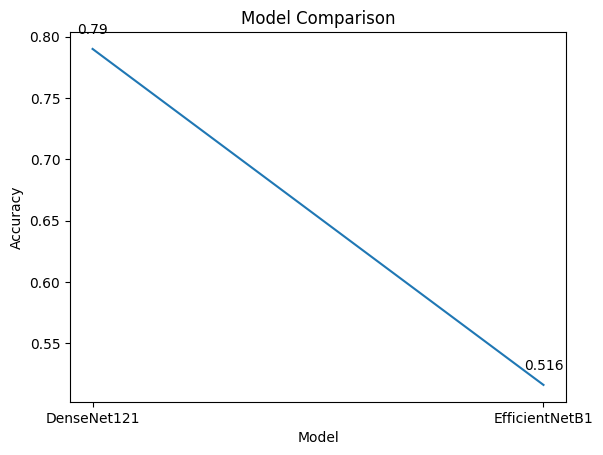

In [17]:
model_names = ['DenseNet121','EfficientNetB1' ]
plt.plot(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')

for i, v in enumerate(accuracies):
  plt.text(i, v + 0.01, str(round(v, 4)), ha='center', va='bottom')
plt.show()

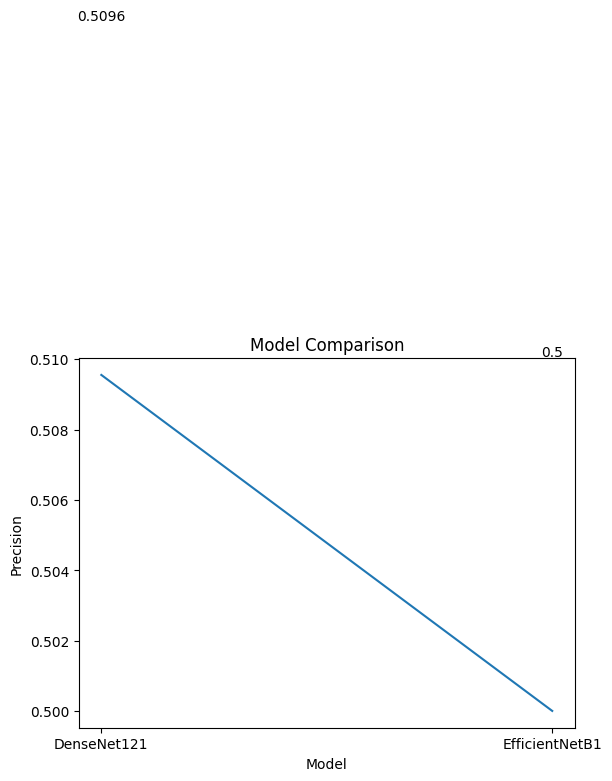

In [21]:
model_names = ['DenseNet121','EfficientNetB1' ]
plt.plot(model_names, precisions)
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Model Comparison')

for i, v in enumerate(precisions):
  plt.text(i, v + 0.01, str(round(v, 4)), ha='center', va='bottom')
plt.show()

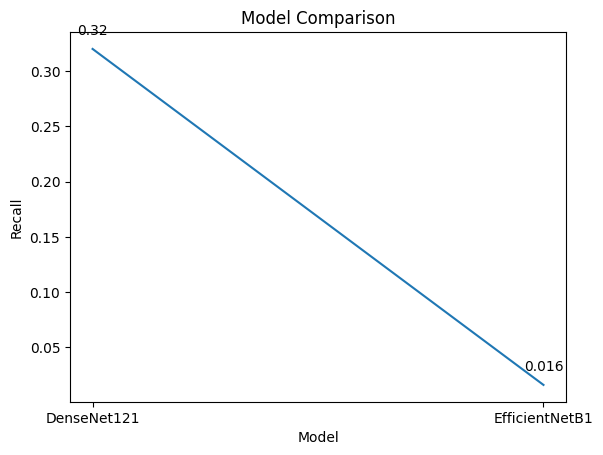

In [19]:
model_names = ['DenseNet121','EfficientNetB1' ]
plt.plot(model_names, recalls)
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Model Comparison')

for i, v in enumerate(recalls):
  plt.text(i, v + 0.01, str(round(v, 4)), ha='center', va='bottom')
plt.show()

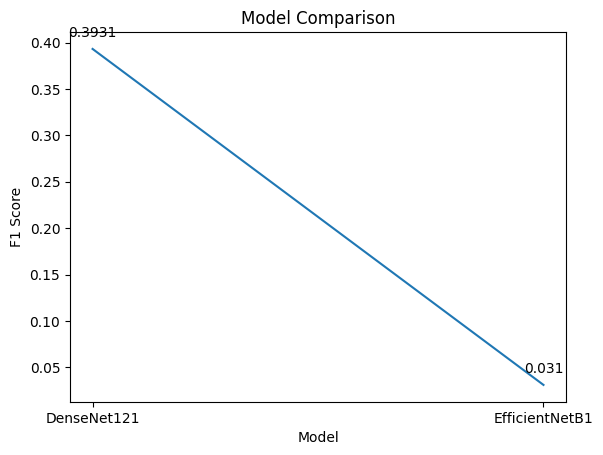

In [20]:
model_names = ['DenseNet121','EfficientNetB1' ]
plt.plot(model_names, f1_scores)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Model Comparison')

for i, v in enumerate(f1_scores):
  plt.text(i, v + 0.01, str(round(v, 4)), ha='center', va='bottom')
plt.show()